# Gradient Descent utilizando sklearn
Exemplo com somente uma feature

Author: H3dema

In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_regression

%matplotlib inline  
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (16, 9)

In [3]:
# gera uma conjunto de dados (aprox. reta) aleatoriamente
n = 150  # numero de pontos (exemplos)
m = 1  # numero de características. Somente uma variável!

x_values, y_values = make_regression(n_samples=n,
                                     n_features=m, 
                                     random_state=0, 
                                     bias=10,
                                     noise=5,
                                     coef=False)

num features: 1


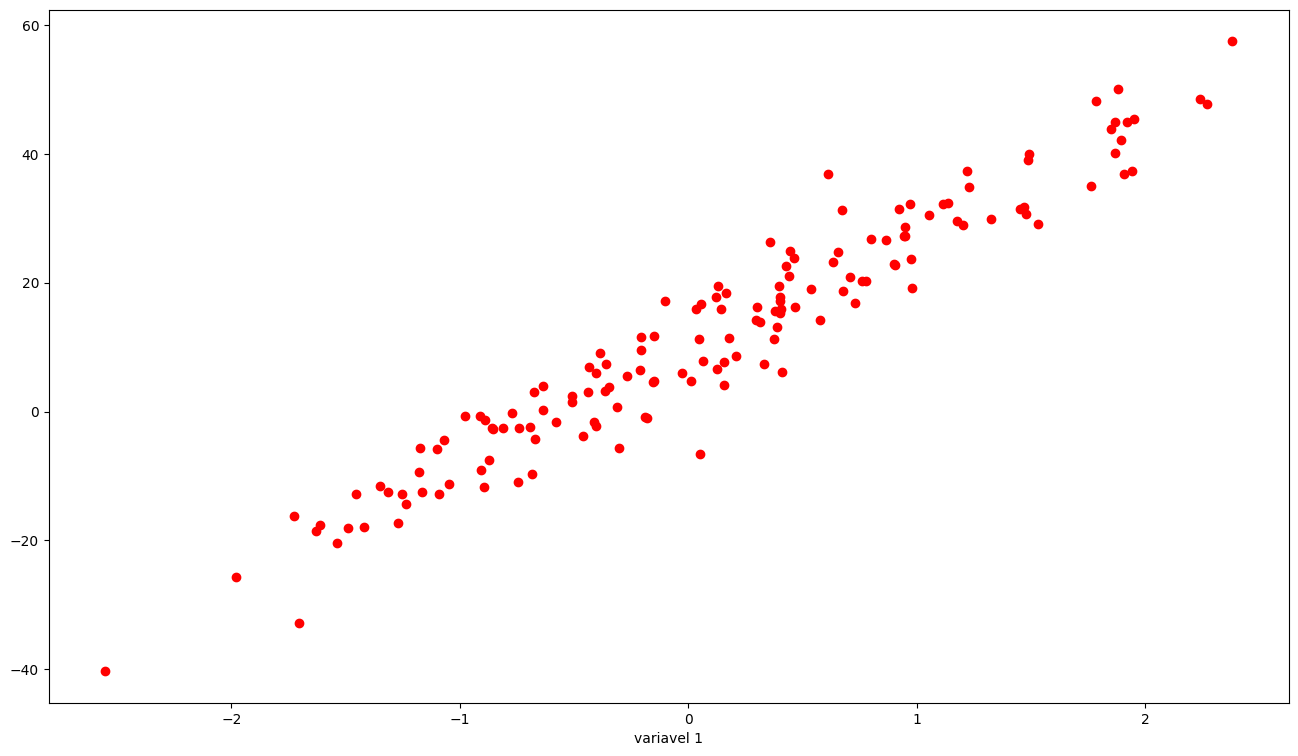

In [4]:
print("num features:", m)
plt.plot(x_values[:,0], y_values, 'ro')
plt.xlabel("variavel 1")
plt.show()

# Criando o regressor

SKLearm permite diversos tipos de ajuste:
* 'squared_loss': ajuste dos mínimos quadrados
* 'Huber' modifica 'squared_loss' para se concentrar menos em obter outliers corretos, passando de quadrado para perda linear após uma distância de epsilon.
* 'Epsilon_insensitive' ignora erros inferiores a epsilon e é linear a partir dai. Curiosidade: Esta é a função de perda usada no SVR.
* 'Squared_epsilon_insensitive' é o mesmo, mas se torna uma perda ao quadrado após uma tolerância do epsilon.

In [12]:
max_iter = 200  # número máximo de iterações

clf = linear_model.SGDRegressor(max_iter=max_iter,
                                loss='squared_error')
_ = clf.fit(x_values, y_values)

In [13]:
# imprime resultados

In [14]:
print("Intercept  :", clf.intercept_)
print("Coeficients:", clf.coef_)

Intercept  : [9.67937522]
Coeficients: [17.73390293]


In [15]:
print("Coef. Determinacao (r²):", clf.score(x_values, y_values))

Coef. Determinacao (r²): 0.9323960496793765


In [16]:
erro = clf.predict(x_values)-y_values
print("Erro médio : ", np.mean(erro))
print("Erro mínimo: ", np.min(erro))
print("Erro máximo: ", np.max(erro))

Erro médio :  -0.011495966869214082
Erro mínimo:  -16.371982136499454
Erro máximo:  17.20722348613827


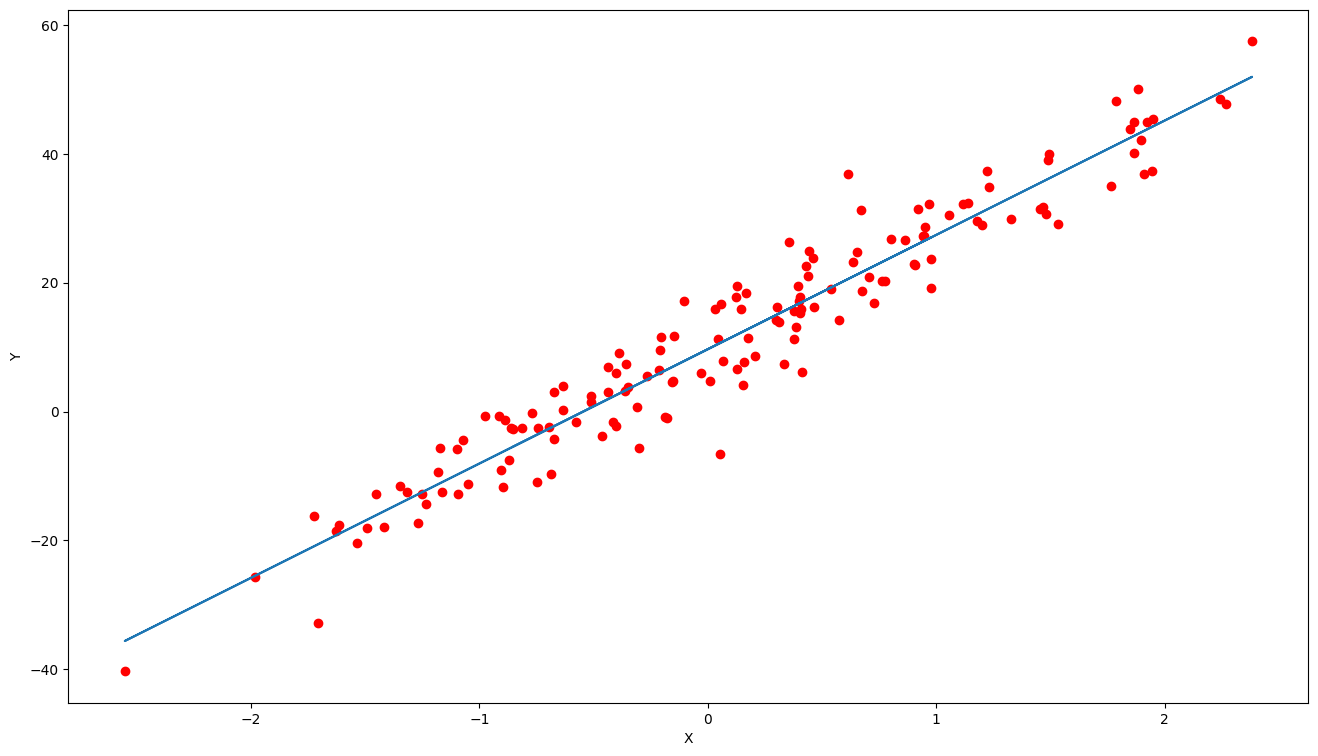

In [17]:
plt.plot(x_values, y_values, 'ro')
plt.plot(x_values, clf.predict(x_values))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()